In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/absenteeism.csv')
pd.options.display.max_columns = None

In [3]:
df.head(2)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0


In [4]:
#missing instances
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

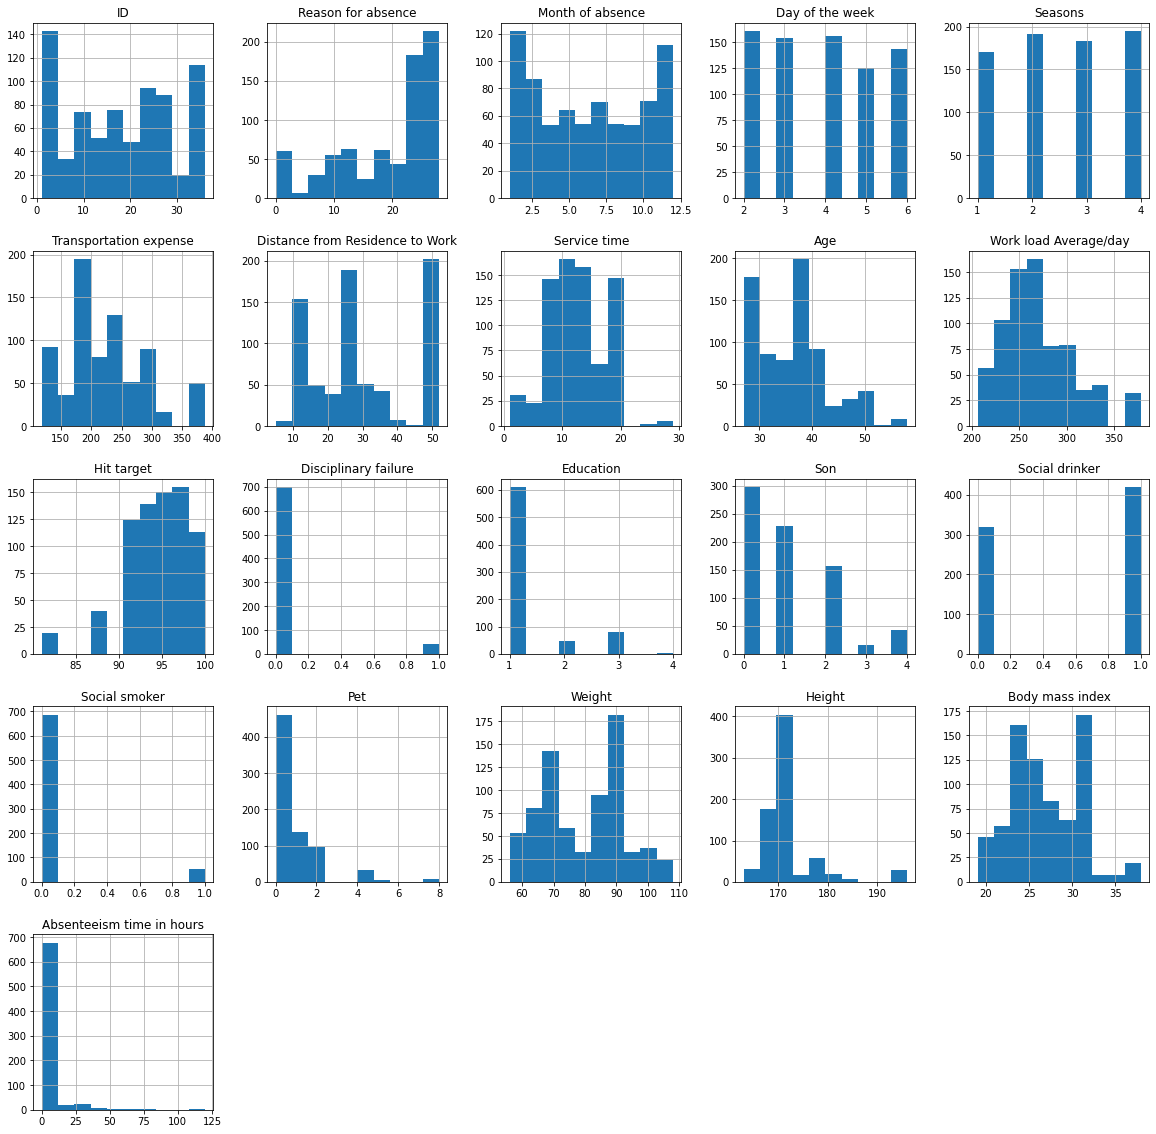

In [5]:
df.hist(figsize=(20, 20))
plt.show()

In [6]:
df.shape

(740, 21)

In [7]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [8]:
df = df.rename(columns = {'ID' : 'id', 'Reason for absence' : 'reason', 'Seasons' : 'season','Month of absence' : 'month', 'Day of the week' : 'day',
                          'Transportation expense' : 'trans_fare', 'Distance from Residence to Work' : 'dis_to_work',
                          'Service time' : 'service_time', 'Age' : 'age', 'Work load Average/day' : 'work_load', 'Hit target' : 'target',
                          'Disciplinary failure' : 'displine_failed', 'Education' : 'edu', 'Son' : 'son',
                          'Social drinker' : 'sco_drinker', 'Social smoker' : 'sco_smoker', 'Pet' : 'pet',  'Weight' : 'weight',
                          'Height' : 'height', 'Body mass index' : 'bmi', 'Absenteeism time in hours' : 'ath'})
df

,id,reason,month,day,season,trans_fare,dis_to_work,service_time,age,work_load,target,displine_failed,edu,son,sco_drinker,sco_smoker,pet,weight,height,bmi,ath
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,7,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,7,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


In [9]:
df = df.drop(['id'], axis = 1)

display(df)

,reason,month,day,season,trans_fare,dis_to_work,service_time,age,work_load,target,displine_failed,edu,son,sco_drinker,sco_smoker,pet,weight,height,bmi,ath
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,0,7,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,0,7,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


In [10]:
#check point

df_preprocessed = df.copy()

df_preprocessed

,reason,month,day,season,trans_fare,dis_to_work,service_time,age,work_load,target,displine_failed,edu,son,sco_drinker,sco_smoker,pet,weight,height,bmi,ath
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,0,7,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,0,7,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


In [11]:
df_preprocessed['weight'].min()

56

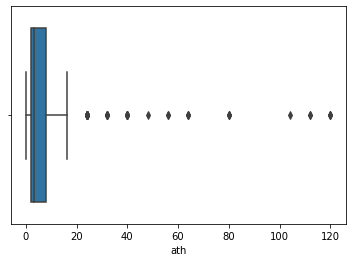

In [12]:
sns.boxplot(df_preprocessed['ath'])
plt.show()

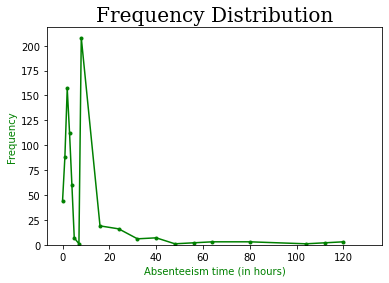

In [13]:
font1 = {'color':'green','size':10}
font2 = {'family':'serif','size':20}


intervals = [0, 1, 2, 3, 4, 5, 7, 8, 16, 24, 32, 40, 48, 56, 64, 80, 104, 112, 120, 130]

y,edges,_=plt.hist(df_preprocessed['ath'], bins=intervals, histtype='step', edgecolor='w')

points = [0, 1, 2, 3, 4, 5, 7, 8, 16, 24, 32, 40, 48, 56, 64, 80, 104, 112, 120]

plt.title("Frequency Distribution", fontdict = font2)
plt.xlabel("Absenteeism time (in hours)", fontdict = font1)
plt.ylabel("Frequency", fontdict = font1)

plt.plot(points,y, 'g.-')
plt.show()

In [14]:
bin_labels = ['A', 'B']

print(df_preprocessed['ath'].median(), df_preprocessed['ath'].min(), df_preprocessed['ath'].max())

df_preprocessed['ath'] = pd.qcut(df['ath'], q=2, labels = bin_labels)

3.0 0 120


In [15]:
df_preprocessed['ath'].value_counts()

A    401
B    339
Name: ath, dtype: int64

In [16]:
df_preprocessed

,reason,month,day,season,trans_fare,dis_to_work,service_time,age,work_load,target,displine_failed,edu,son,sco_drinker,sco_smoker,pet,weight,height,bmi,ath
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,B
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,A
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,A
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,B
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,B
736,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,B
737,0,7,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,A
738,0,7,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,A


In [17]:
df_preprocessed.describe()

,reason,month,day,season,trans_fare,dis_to_work,service_time,age,work_load,target,displine_failed,edu,son,sco_drinker,sco_smoker,pet,weight,height,bmi
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.352703,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027
std,8.433406,3.412733,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452
min,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000


In [18]:
X = df_preprocessed.drop(columns=['ath'])
y_train = df_preprocessed['ath']

In [19]:
# feature scaling

def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

X_train = min_max_scaling(X)

In [20]:
X_train

,reason,month,day,season,trans_fare,dis_to_work,service_time,age,work_load,target,displine_failed,edu,son,sco_drinker,sco_smoker,pet,weight,height,bmi
0,0.928571,0.545455,0.25,0.000000,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.000000,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947
1,0.000000,0.545455,0.25,0.000000,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.000000,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579
2,0.821429,0.545455,0.50,0.000000,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.000000,0.00,1.0,0.0,0.000,0.634615,0.212121,0.631579
3,0.250000,0.545455,0.75,0.000000,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.000000,0.50,1.0,1.0,0.000,0.230769,0.151515,0.263158
4,0.821429,0.545455,0.75,0.000000,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.000000,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.500000,0.545455,0.25,0.000000,0.633333,0.659574,0.428571,0.193548,0.339296,0.631579,0.0,0.000000,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947
736,0.392857,0.545455,0.25,0.000000,0.433333,0.127660,0.464286,0.322581,0.339296,0.631579,0.0,0.666667,0.25,0.0,0.0,0.125,0.615385,0.272727,0.526316
737,0.000000,0.545455,0.25,0.000000,0.000000,0.191489,0.428571,0.419355,0.377540,0.736842,0.0,0.000000,0.25,1.0,0.0,1.000,0.807692,0.212121,0.789474
738,0.000000,0.545455,0.50,0.333333,0.418519,0.638298,0.464286,0.387097,0.377540,0.736842,0.0,0.000000,0.50,1.0,0.0,0.250,0.846154,0.212121,0.842105


In [21]:
from numpy import mean, std
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

# 10-fold stratifiedFold
cv = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)

def sort_scoring(scoring):
    if scoring == 'precision':
        return make_scorer(precision_score, average = 'macro')
    elif scoring == 'f1':
        return make_scorer(f1_score, average = 'macro')
    elif scoring == 'recall':
        return make_scorer(recall_score, average = 'macro')
    elif scoring == 'roc_auc':
        return make_scorer(roc_auc_score, average = 'macro', multi_class='ovr', needs_proba=True)
    
    return scoring



def models(X_train, y_train, score):
    
    scoring = sort_scoring(score)
    
    scoresLR = cross_val_score(LogisticRegression(), X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1, error_score='raise')
    print('Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))
    
    scoresRF = cross_val_score(RandomForestClassifier(random_state = 42), X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
    print('Random Forest Model: %.3f (%.3f)' % (mean(scoresRF), std(scoresRF)))

    scoresSV = cross_val_score(SVC(probability=True), X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1, error_score='raise')
    print('SVM Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))

    scoresKNN = cross_val_score(KNeighborsClassifier(), X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
    print('KNN Model: %.3f (%.3f)' % (mean(scoresKNN), std(scoresKNN)))
    
    scoresAdB = cross_val_score(AdaBoostClassifier(), X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
    print('AdaBoost Classifier Model: %.3f (%.3f)' % (mean(scoresAdB), std(scoresAdB)))

    scoresGB = cross_val_score(GradientBoostingClassifier(), X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
    print('Gradient Boosting Classifier Model: %.3f (%.3f)' % (mean(scoresGB), std(scoresGB)))


In [22]:
print('Precision:\n')
models(X_train, y_train, 'precision')

print('\nRecall:\n')
models(X_train, y_train, 'recall')

print('\nF-measure:\n')
models(X_train, y_train, 'f1')

print('\nROC:\n')
models(X_train, y_train, 'roc_auc')

print('\nAccuracy:\n')
models(X_train, y_train, 'accuracy')

Precision:

Logistic Regression Model: 0.738 (0.057)
Random Forest Model: 0.781 (0.043)
SVM Model: 0.751 (0.060)
KNN Model: 0.706 (0.059)
AdaBoost Classifier Model: 0.772 (0.035)
Gradient Boosting Classifier Model: 0.794 (0.039)

Recall:

Logistic Regression Model: 0.733 (0.058)
Random Forest Model: 0.778 (0.043)
SVM Model: 0.746 (0.057)
KNN Model: 0.703 (0.058)
AdaBoost Classifier Model: 0.769 (0.036)
Gradient Boosting Classifier Model: 0.787 (0.036)

F-measure:

Logistic Regression Model: 0.734 (0.058)
Random Forest Model: 0.779 (0.043)
SVM Model: 0.747 (0.057)
KNN Model: 0.702 (0.058)
AdaBoost Classifier Model: 0.768 (0.037)
Gradient Boosting Classifier Model: 0.783 (0.035)

ROC:

Logistic Regression Model: 0.810 (0.057)
Random Forest Model: 0.860 (0.041)
SVM Model: 0.807 (0.058)
KNN Model: 0.775 (0.048)
AdaBoost Classifier Model: 0.856 (0.039)
Gradient Boosting Classifier Model: 0.877 (0.036)

Accuracy:

Logistic Regression Model: 0.738 (0.056)
Random Forest Model: 0.781 (0.042)
SV

***
# Grid Search Cv
***

In [23]:
from sklearn.model_selection import GridSearchCV

### Logistic Reg
***

In [24]:
# instantiate base Logistic Regression model class
lr = LogisticRegression()

# define gridsearch parameters
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['none', 'l1', 'l2', 'elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01]}

# instantiate gridsearchcv class
lrgs = GridSearchCV(estimator = lr, param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
lrgs.fit(X_train, y_train)

# params
lrgs.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}

In [25]:
lr1 = LogisticRegression(C= 100, penalty = 'none', solver = 'newton-cg')

### Random Forest
***

In [26]:
# instantiate base random forest model class
rf = RandomForestClassifier(random_state=42)

# define gridsearch parameters
param_grid = {'criterion': ['gini', 'entropy'], 'n_estimators': [10, 100, 1000], 'max_features': ['auto', 'sqrt', 'log2']}

# instantiate gridsearchcv class
rfgs = GridSearchCV(estimator = rf,param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
rfgs.fit(X_train, y_train)

# params
rfgs.best_params_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}

In [27]:
rf1=RandomForestClassifier(criterion = 'gini', n_estimators = 100, max_features = 'auto', random_state=42)

### SVC
***

In [28]:
# instantiate base support vector machine model class
svc = SVC(probability=True)

# define gridsearch parameters
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale', 'auto']}

# instantiate gridsearchcv class
svcgs = GridSearchCV(estimator = svc, param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
svcgs.fit(X_train, y_train)

# params
svcgs.best_params_

Fitting 10 folds for each of 40 candidates, totalling 400 fits


{'C': 50, 'gamma': 'scale', 'kernel': 'linear'}

In [29]:
svc1= SVC(probability=True, C = 50, gamma = 'scale', kernel = 'linear')

### KNN
***

In [30]:
# instantiate base k-nearest-neighbor model class
knn = KNeighborsClassifier()

# define gridsearch parameters
param_grid = {'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski'], "n_neighbors": [1, 3, 5, 7, 9, 13, 15, 17, 19, 21]}


# instantiate gridsearchcv class
knngs = GridSearchCV(estimator = knn, param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
knngs.fit(X_train, y_train)

# params
knngs.best_params_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [31]:
knn1= KNeighborsClassifier(metric= 'manhattan', n_neighbors= 7, weights= 'distance')

### AdaBoost
***

In [32]:
# instantiate base adaBoost model class
adbst = AdaBoostClassifier(random_state=42)


# define gridsearch parameters
param_grid = {'n_estimators': [10, 100, 1000], 'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01], 'algorithm': ['SAMME', 'SAMME.R'] }


# instantiate gridsearchcv class
adbstgs = GridSearchCV(estimator = adbst, param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
adbstgs.fit(X_train, y_train)

# params
adbstgs.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 1000}

In [33]:
adbst1 = AdaBoostClassifier(random_state=42, n_estimators = 1000, learning_rate= 0.1, algorithm= 'SAMME.R')

### Gradient Boosting
***

In [34]:
# instantiate base gradient boosting model class
gb = GradientBoostingClassifier(random_state=42)


# define gridsearch parameters
param_grid = {'criterion':['friedman_mse', 'mse', 'mae'], 'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [10, 100, 1000]}


# instantiate gridsearchcv class
gbgs = GridSearchCV(estimator = gb, param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
gbgs.fit(X_train, y_train)

# params
gbgs.best_params_

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


{'criterion': 'mse',
 'learning_rate': 0.5,
 'max_features': 'sqrt',
 'n_estimators': 1000}

In [35]:
gb1 = GradientBoostingClassifier(random_state=42, n_estimators = 1000, learning_rate= 0.5, criterion= 'mse', max_features='sqrt' )

In [36]:
def mod_models(X_train, y_train, score):
    
    scoring = sort_scoring(score)
    
    scoresLR = cross_val_score(lr1, X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1, error_score='raise')
    print('Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))
    
    scoresRF = cross_val_score(rf1, X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
    print('Random Forest Model: %.3f (%.3f)' % (mean(scoresRF), std(scoresRF)))

    scoresSV = cross_val_score(svc1, X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1, error_score='raise')
    print('SVM Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))

    scoresKNN = cross_val_score(knn1, X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
    print('KNN Model: %.3f (%.3f)' % (mean(scoresKNN), std(scoresKNN)))
    
    scoresAdB = cross_val_score(adbst1, X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
    print('AdaBoost Classifier Model: %.3f (%.3f)' % (mean(scoresAdB), std(scoresAdB)))
    
    scoresGB = cross_val_score(gb1, X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
    print('Gradient Boosting Classifier Model: %.3f (%.3f)' % (mean(scoresGB), std(scoresGB)))
    
def evaluate_models(X_train, y_train):
    
    print('Precision:\n')
    mod_models(X_train, y_train, 'precision')
    
    print('\nRecall:\n')
    mod_models(X_train, y_train, 'recall')
    
    print('\nF-measure:\n')
    mod_models(X_train, y_train, 'f1')
    
    print('\nROC:\n')
    mod_models(X_train, y_train, 'roc_auc')
    
    print('\nAccuracy:\n')
    mod_models(X_train, y_train, 'accuracy')
    
    

In [37]:
evaluate_models(X_train, y_train)

Precision:

Logistic Regression Model: 0.754 (0.049)
Random Forest Model: 0.781 (0.043)
SVM Model: 0.759 (0.053)
KNN Model: 0.743 (0.069)
AdaBoost Classifier Model: 0.792 (0.047)
Gradient Boosting Classifier Model: 0.794 (0.038)

Recall:

Logistic Regression Model: 0.749 (0.047)
Random Forest Model: 0.778 (0.043)
SVM Model: 0.753 (0.049)
KNN Model: 0.738 (0.066)
AdaBoost Classifier Model: 0.790 (0.046)
Gradient Boosting Classifier Model: 0.792 (0.040)

F-measure:

Logistic Regression Model: 0.750 (0.048)
Random Forest Model: 0.779 (0.043)
SVM Model: 0.754 (0.050)
KNN Model: 0.738 (0.067)
AdaBoost Classifier Model: 0.789 (0.048)
Gradient Boosting Classifier Model: 0.791 (0.039)

ROC:

Logistic Regression Model: 0.816 (0.054)
Random Forest Model: 0.860 (0.041)
SVM Model: 0.812 (0.063)
KNN Model: 0.787 (0.055)
AdaBoost Classifier Model: 0.863 (0.045)
Gradient Boosting Classifier Model: 0.857 (0.046)

Accuracy:

Logistic Regression Model: 0.753 (0.048)
Random Forest Model: 0.781 (0.042)
SV

***
# Feature selection
***

In [38]:
# RFE
from sklearn.feature_selection import RFE

columns_name = X_train.columns

for index in range(1,20):
    
    selector = RFE(DecisionTreeClassifier(), n_features_to_select = index, step = 1)
    selector = selector.fit(X_train, y_train)
    X_train_rfe = selector.transform(X_train)
        
    print('Selected number of features: ', index)
    
    for i in range(X_train.shape[1]):

        if selector.support_[i]:
            print('%s,' % (columns_name[i]), end =" ")
    
    print('\n')
    print('Accuracy:')
    mod_models(X_train_rfe, y_train, 'accuracy')

    print('\n')

Selected number of features:  1
reason, 

Accuracy:
Logistic Regression Model: 0.603 (0.061)
Random Forest Model: 0.800 (0.047)
SVM Model: 0.601 (0.066)
KNN Model: 0.786 (0.050)
AdaBoost Classifier Model: 0.803 (0.052)
Gradient Boosting Classifier Model: 0.803 (0.054)


Selected number of features:  2
reason, work_load, 

Accuracy:
Logistic Regression Model: 0.597 (0.060)
Random Forest Model: 0.774 (0.048)
SVM Model: 0.601 (0.066)
KNN Model: 0.766 (0.047)
AdaBoost Classifier Model: 0.803 (0.048)
Gradient Boosting Classifier Model: 0.781 (0.050)


Selected number of features:  3
reason, trans_fare, work_load, 

Accuracy:
Logistic Regression Model: 0.642 (0.076)
Random Forest Model: 0.764 (0.048)
SVM Model: 0.645 (0.073)
KNN Model: 0.735 (0.041)
AdaBoost Classifier Model: 0.809 (0.044)
Gradient Boosting Classifier Model: 0.758 (0.048)


Selected number of features:  4
reason, trans_fare, service_time, work_load, 

Accuracy:
Logistic Regression Model: 0.638 (0.078)
Random Forest Model: 0.

***
# Permutation
***

reason               Score: 0.12270
month                Score: 0.06595
day                  Score: 0.10054
season               Score: 0.08649
trans_fare           Score: 0.03946
dis_to_work          Score: 0.05351
service_time         Score: 0.01919
age                  Score: 0.03081
work_load            Score: 0.06135
target               Score: 0.04676
displine_failed      Score: 0.03730
edu                  Score: 0.02838
son                  Score: 0.04432
sco_drinker          Score: 0.06649
sco_smoker           Score: 0.01622
pet                  Score: 0.01757
weight               Score: 0.03622
height               Score: 0.01676
bmi                  Score: 0.03297


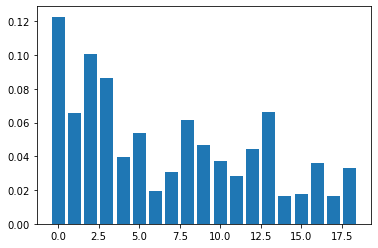

In [39]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

knn1 = knn1.fit(X_train, y_train)
results = permutation_importance(knn1, X_train, y_train, scoring='accuracy', n_jobs=1)

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('%-20s Score: %3.5f' % (columns_name[i],v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [40]:
X_select = X_train[['reason','day']]
X_select

,reason,day
0,0.928571,0.25
1,0.000000,0.25
2,0.821429,0.50
3,0.250000,0.75
4,0.821429,0.75
...,...,...
735,0.500000,0.25
736,0.392857,0.25
737,0.000000,0.25
738,0.000000,0.50


In [41]:
evaluate_models(X_select, y_train)

Precision:

Logistic Regression Model: 0.615 (0.078)
Random Forest Model: 0.775 (0.051)
SVM Model: 0.597 (0.080)
KNN Model: 0.759 (0.043)
AdaBoost Classifier Model: 0.804 (0.054)
Gradient Boosting Classifier Model: 0.788 (0.051)

Recall:

Logistic Regression Model: 0.594 (0.060)
Random Forest Model: 0.761 (0.049)
SVM Model: 0.585 (0.067)
KNN Model: 0.746 (0.040)
AdaBoost Classifier Model: 0.800 (0.052)
Gradient Boosting Classifier Model: 0.772 (0.048)

F-measure:

Logistic Regression Model: 0.584 (0.063)
Random Forest Model: 0.761 (0.051)
SVM Model: 0.578 (0.073)
KNN Model: 0.746 (0.042)
AdaBoost Classifier Model: 0.801 (0.052)
Gradient Boosting Classifier Model: 0.774 (0.050)

ROC:

Logistic Regression Model: 0.639 (0.068)
Random Forest Model: 0.839 (0.049)
SVM Model: 0.656 (0.071)
KNN Model: 0.825 (0.041)
AdaBoost Classifier Model: 0.850 (0.051)
Gradient Boosting Classifier Model: 0.839 (0.047)

Accuracy:

Logistic Regression Model: 0.611 (0.059)
Random Forest Model: 0.768 (0.048)
SV

## ENSEMBLE
***

         reason Score: 0.26116
          month Score: 0.08105
            day Score: 0.07662
         season Score: 0.04599
     trans_fare Score: 0.05979
    dis_to_work Score: 0.02711
   service_time Score: 0.03708
            age Score: 0.03375
      work_load Score: 0.09885
         target Score: 0.07852
displine_failed Score: 0.04118
            edu Score: 0.00772
            son Score: 0.03383
    sco_drinker Score: 0.01078
     sco_smoker Score: 0.00512
            pet Score: 0.01227
         weight Score: 0.03129
         height Score: 0.02625
            bmi Score: 0.03164


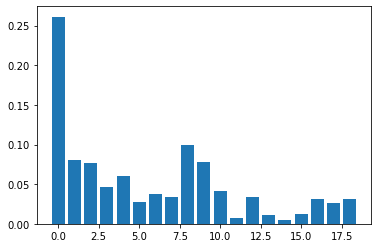

In [42]:
# Random Forest
rf1 = rf1.fit(X_train, y_train)

# get importance
importance = rf1.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('%15s Score: %.5f' % (columns_name[i],v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

         reason Score: 0.26116
          month Score: 0.08105
            day Score: 0.07662
         season Score: 0.04599
     trans_fare Score: 0.05979
    dis_to_work Score: 0.02711
   service_time Score: 0.03708
            age Score: 0.03375
      work_load Score: 0.09885
         target Score: 0.07852
displine_failed Score: 0.04118
            edu Score: 0.00772
            son Score: 0.03383
    sco_drinker Score: 0.01078
     sco_smoker Score: 0.00512
            pet Score: 0.01227
         weight Score: 0.03129
         height Score: 0.02625
            bmi Score: 0.03164


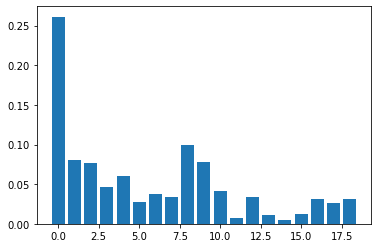

In [43]:
# AdaBoost
adbst1 = adbst1.fit(X_train, y_train)

# get importance
importance1 = adbst1.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('%15s Score: %.5f' % (columns_name[i],v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

         reason Score: 0.26116
          month Score: 0.08105
            day Score: 0.07662
         season Score: 0.04599
     trans_fare Score: 0.05979
    dis_to_work Score: 0.02711
   service_time Score: 0.03708
            age Score: 0.03375
      work_load Score: 0.09885
         target Score: 0.07852
displine_failed Score: 0.04118
            edu Score: 0.00772
            son Score: 0.03383
    sco_drinker Score: 0.01078
     sco_smoker Score: 0.00512
            pet Score: 0.01227
         weight Score: 0.03129
         height Score: 0.02625
            bmi Score: 0.03164


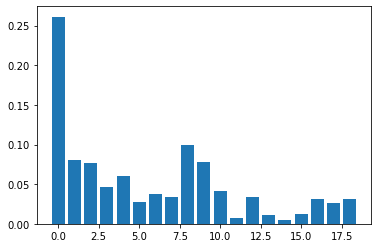

In [44]:
# Gradient Boosting
gb1 = gb1.fit(X_train, y_train)

# get importance
importance1 = gb1.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('%15s Score: %.5f' % (columns_name[i],v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [46]:
X_select2 = X_train[['reason']]
X_select2

evaluate_models(X_select2, y_train)

Precision:

Logistic Regression Model: 0.601 (0.077)
Random Forest Model: 0.803 (0.049)
SVM Model: 0.599 (0.081)
KNN Model: 0.792 (0.055)
AdaBoost Classifier Model: 0.804 (0.054)
Gradient Boosting Classifier Model: 0.805 (0.056)

Recall:

Logistic Regression Model: 0.588 (0.064)
Random Forest Model: 0.797 (0.047)
SVM Model: 0.587 (0.069)
KNN Model: 0.784 (0.048)
AdaBoost Classifier Model: 0.800 (0.052)
Gradient Boosting Classifier Model: 0.800 (0.055)

F-measure:

Logistic Regression Model: 0.580 (0.069)
Random Forest Model: 0.797 (0.048)
SVM Model: 0.579 (0.074)
KNN Model: 0.784 (0.050)
AdaBoost Classifier Model: 0.801 (0.052)
Gradient Boosting Classifier Model: 0.800 (0.055)

ROC:

Logistic Regression Model: 0.659 (0.072)
Random Forest Model: 0.855 (0.052)
SVM Model: 0.659 (0.072)
KNN Model: 0.839 (0.045)
AdaBoost Classifier Model: 0.857 (0.054)
Gradient Boosting Classifier Model: 0.855 (0.051)

Accuracy:

Logistic Regression Model: 0.603 (0.061)
Random Forest Model: 0.800 (0.047)
SV

***
# RFE
***

In [47]:
# prominent 3 feature by RFE
selector = RFE(DecisionTreeClassifier(), n_features_to_select = 3, step = 1)
selector = selector.fit(X_train, y_train)
X_train_rfe = selector.transform(X_train)

evaluate_models(X_train_rfe, y_train)

Precision:

Logistic Regression Model: 0.641 (0.085)
Random Forest Model: 0.763 (0.048)
SVM Model: 0.643 (0.080)
KNN Model: 0.736 (0.043)
AdaBoost Classifier Model: 0.811 (0.045)
Gradient Boosting Classifier Model: 0.759 (0.052)

Recall:

Logistic Regression Model: 0.630 (0.079)
Random Forest Model: 0.762 (0.050)
SVM Model: 0.635 (0.076)
KNN Model: 0.731 (0.044)
AdaBoost Classifier Model: 0.810 (0.044)
Gradient Boosting Classifier Model: 0.756 (0.051)

F-measure:

Logistic Regression Model: 0.626 (0.085)
Random Forest Model: 0.761 (0.049)
SVM Model: 0.632 (0.080)
KNN Model: 0.731 (0.044)
AdaBoost Classifier Model: 0.808 (0.045)
Gradient Boosting Classifier Model: 0.756 (0.049)

ROC:

Logistic Regression Model: 0.686 (0.070)
Random Forest Model: 0.840 (0.047)
SVM Model: 0.691 (0.070)
KNN Model: 0.781 (0.055)
AdaBoost Classifier Model: 0.869 (0.051)
Gradient Boosting Classifier Model: 0.847 (0.051)

Accuracy:

Logistic Regression Model: 0.642 (0.076)
Random Forest Model: 0.764 (0.048)
SV

In [48]:
rf = pd.read_csv('data/results.csv')

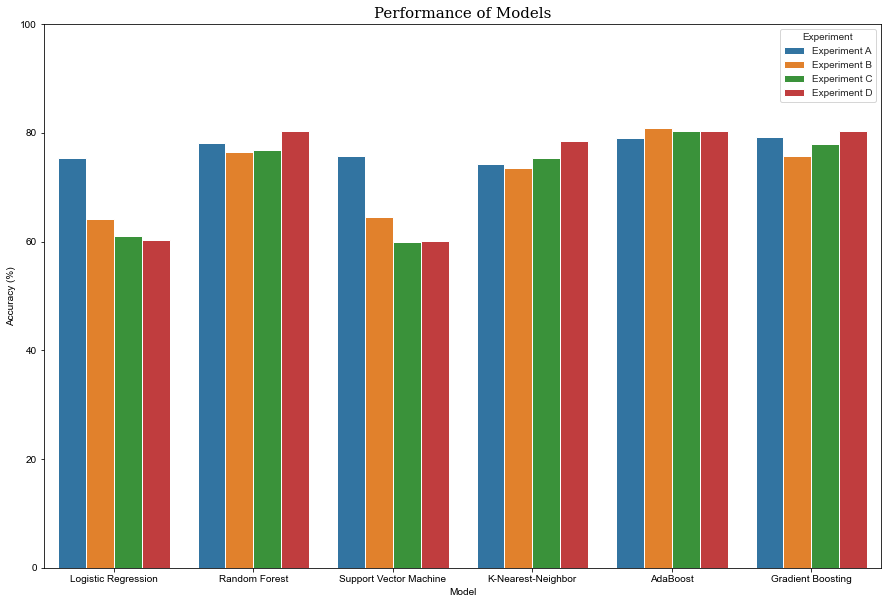

In [49]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_yticks([0, 20, 40, 60, 80, 100])

sns.set_style("white")
sns.color_palette("Set2")
plot = sns.barplot(x = "Classifier", y = rf['Accuracy'], hue ="Experiment", data = rf)
plot.set(ylim=(0, 100))

plt.title("Performance of Models", fontdict = {'family':'serif','size':15})
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")



plt.show()